# Genome data analysis in Python

### A brief tutorial on the use of *jupyter notebooks* and the python data analysis library *pandas* for genomic data analysis. 
Workshop on Population and Speciation Genomics, Český Krumlov, January 2020. <br>
By Hannes Svardal (<hannes.svardal@uantwerpen.be>)

This is a jupyter notebook running a Python 3 kernel. The Jupyter Notebook App (formerly IPython Notebook) is an application running inside the browser. Jupyter notebooks can run different kernels: Python 2/3, R, Julia, bash, ...

Further resources about jupyter notebooks can be found here: <br>
 - https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/ <br>
 - https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook

Jupyter notebooks can run locally or on a server. You access them in your browser. <br>

To start the jupyter server
 - Log into your amazon cloud instance: ```ssh wpsg@my-ip-here.compute-1.amazonaws.com``` (replace my-ip-here with your instance's address)
 - Navigate into the tutorial directory: ```cd ~/workshop_materials/03a_jupyter_notebooks/```
 - Start the notebook server: ```jupyter notebook --no-browser --port=8888```
 - In your local browser, navigate to the web address: http://my-ip-here.compute-1.amazonaws.com:7000
 - On the web page, type in the password *evomics2018*

Now you should have this notebook in front of you. 
 - At the top of the webpage, the notebook environment has a **header** and a **toolbar**, which can be used to change settings, formatting, and interrupt or restart the kernel that interprets the notebook cells.
 - The body of the notebook is built up of cells of two has two major types: markdown cells and code cells. You can set the type for each cell either using the toolbar or with keyboard commands. The right-most button in the toolbar shows all keyboard shortcuts.
 - **Markdown cells** (this cell and all above) contain text that can be formatted using html-like syntax <br> http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html <br>
 Double-klick into a markdown cell (like this one) to get into *edit mode*
 - **Code cells** contain computer code (in our case written in python 2). Code cells have an **intput field** in which you type code. Cells are evaluated by pressing *shift + return* with the cursor being in the cell. This produces an **output field** with the result of the evaluation that would be returned to std-out in a normal python (or R) session. Below are a few examples of input cells and the output. Note that by default only the result of the last operation will be output, and that only if it is not asigned to a variable, but all lines will be evaluated.

Here are some very basic operations. Evaluate the cells below and check the results.

In [13]:
# This is a code cell.
# Evaluate it by moving the cursor in the cell an pressing <shift + return>.
1+1

2

In [14]:
# This is anoter code cell.
# There is no output because the last operation is assigned to a variable.
# However, the operations are performed and c is now assigned a value.
# Evaluate this cell!
a = 5
b = 3
c = a * b

In [15]:
# The variables should now be assigned. Evaluate.
print('a is', a)
print('b is', b)
print('c is a*b, which is', c)

a is 5
b is 3
c is a*b, which is 15


Try to create more cells using either the "plus" button in the toolbar above or the keyboard combination (Ctrl + M) + B (First Ctrl + M together, then B). Try to define variables and do calculations in these cells.

## Python basics

This is very basic python stuff. People who are farmiliar with python can skip this part.

### loading modules

In [16]:
# Load some packages that we will need below
# by evaluating this cell
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
import pandas

In [4]:
import numpy

In [10]:
np.__file__

'/Users/hannessvardal/miniconda3/lib/python3.9/site-packages/numpy/__init__.py'

In [18]:
# Refer to objects (e.g. functions) from these packages by with module.object
# functions are called with giving arguments in parenthesis
print(np.sqrt(10))
# this is a constant defined in the package numpy
print(np.pi)

3.1622776601683795
3.141592653589793


### lists, list comprehension, and numpy arrays

Lists are a very basic data type in python. Elements can be accessed by index. **Attention:** Different from R, Python data structures are generally zero indexed. The first element has index 0.

In [19]:
list0 = [1, 2, 3, 4]
print(list0)
print(list0[1])

[1, 2, 3, 4]
2


In [20]:
# the last element can be accessed with the index -1 (careful, this behaviour is different from R)
print(list0[-1])

# return elements 2 to 3 from the list. 
print(list0[1:3])
# Note how this selection is left open. Element with index 3 (the 4th element) is not included in 1:3.

4
[2, 3]


*List comprehensions* are a very useful feature in Python. It is an in-line way of iteratin through a list.

In [21]:
# This is the syntax of a so-called list comprehension. 
# A very useful feature to create a new list by iterating through other list(s).
squares = [i*i for i in list0]
print('squares:', squares)

# Doing this in conventional syntax would be more verbose:
squares2 = []
for i in list0:
    squares2.append(i*i)
print('squares2:', squares2)

squares: [1, 4, 9, 16]
squares2: [1, 4, 9, 16]


A numpy array is a vector-like object of arbitrary dimensions. Operations on numpy arrays are generally faster than iterating through lists.

In [22]:
array0 = np.array(list0)
print(array0)

[1 2 3 4]


In [28]:
# Operations on an array are usually element-wise.
# Square the array elements.
print(array0 * array0)

[ 1  4  9 16]


In [ ]:
# Instantiate array 0 .. 19
x = np.arange(20)
print(x)

In [30]:
# 2D array
array2d = np.array(
                [[1,2,3],
                [4,5,6]]
                    )
# A 2d array is in principle a matrix (but there is a also a different data type called matrix in numpy)
print('2d array:')
print(array2d)
print('element-wise square:')
print(array2d*2)
print('number of rows and columns:', array2d.shape)

2d array:
[[1 2 3]
 [4 5 6]]
element-wise square:
[[ 2  4  6]
 [ 8 10 12]]
number of rows and columns: (2, 3)


### functions

In [31]:
# This is a regular function in python
def square(x):
    """
    This top part of the function definition
    in three quotes is a help string.
    
    This is a regular function
    definition. Defined in evomics2020.
    
    This function takes a number (int or float)
    and returns the square of it.
    
    """
    s = x*x
    return s

print('This is a regular function:', square)
print(square(5))

This is a regular function: <function square at 0x136371c10>
25


### anonymous (lambda) functions

A lambda function is a function that is not bound to a name at creation time.

In [32]:
# A lambda function is defined in-line; here it is bound to a name, 
# but that is not necessary
square2 = lambda x: x*x
print('This is an anonymous function:', square2)
print(square2(5))

This is an anonymous function: <function <lambda> at 0x1363710d0>
25


The advantage of an anonymous function is that you can define it on the go. Here an example.

In [33]:
map?

In [ ]:
# The map function is a function that takes as input 
# a function and a list, and applies the function to 
# each value in the list.
# For example, apply square to each value in list0:
list( map( square, list0) )

In [41]:
%%timeit
result = []
for element in list0:
    r = element**2
    result.append(r)
result

864 ns ± 1.42 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [44]:
list(map( square, list0))

[1, 4, 9, 16]

In [ ]:
#Here the same but defining the function on the go.
#This is very useful when we apply functions to data frames below
list( map( lambda x: x*x, list0) )

## Ipython

Ipython is an interactive interface for python. Jupyter notebooks that run a python kernel use Ipython. It basically is a wrapper around python that adds some useful features and commands. A tutorial can be found here: https://ipython.org/ipython-doc/3/interactive/tutorial.html

The four most helpful commands (type in a code cell and evaluate)

|command|	description|
|------|------|
|?|	Introduction and overview of IPython’s features.|
|%quickref|	Quick reference.|
|help|	Python’s own help system.|
|object?|	Details about ‘object’, use ‘object??’ for extra details.|

In [46]:
# Evaluate this to get the documentation of the function **map** as a popup below. 
map?

In [47]:
# Get the docstring of your own function defined above.
square?

### Ipython magic

IPython *magic commands*, are tools that simplify various tasks. They are prefixed by the % character. Magic commands come in two flavors: line magics, which are denoted by a single % prefix and operate on a single line of input, and cell magics, which are denoted by a double %% prefix and operate on multiple lines of input. 

#### Examples

In [48]:
# Time a command with %timeit
%timeit 1+1

7.13 ns ± 0.00703 ns per loop (mean ± std. dev. of 7 runs, 100,000,000 loops each)


In [49]:
%%timeit
#Time a cell operation
x = range(10000)
max(x)

124 µs ± 2.7 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [50]:
# This is a very useful magic that allows us to create plots inside the jupyter notebook
# EVALUATE THIS CELL!!!
%matplotlib inline

In [53]:
np.random.randn(10)

array([ 0.68713717, -0.15187363, -1.19540387, -1.24064143, -1.04724043,
        0.72933169,  0.22867622, -1.05461813,  0.74776522,  1.96678808])

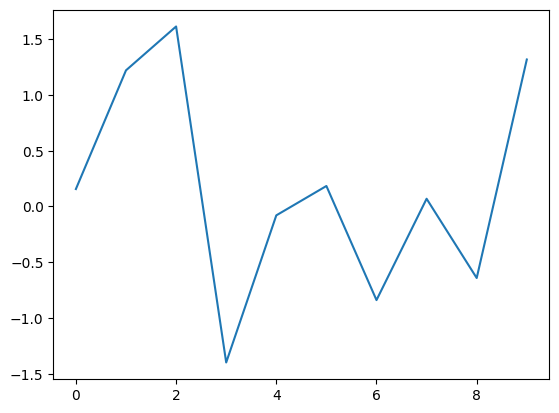

In [56]:
# Make a basic plot
plt.plot(np.random.randn(10))

### running shell commands

You can use ipython magic to run a command using the system shell and return the output. Simply prepend a command with "!" or start a cell with %%bash for a multi line command.

In [58]:
# Here ls is just the bash command ls. You could use any other bash command.
%bash ls

UsageError: Line magic function `%bash` not found (But cell magic `%%bash` exists, did you mean that instead?).


In [59]:
#A list of all files in the current working directory"
files = !ls
print(files)

['201801_jupyter_pandas_tutorial.ipynb', '202001_genome_data_analysis_jupyter_pandas.zip', '202001_jupyter_pandas_tutorial.ipynb', 'cichlid_data_outgroup.vcf.gz', 'cichlid_data_outgroup.vcf.gz.tbi', 'cichlid_sample_metadata.csv']


In [60]:
# Run a program that is in your path.
!msmc2

/bin/bash: msmc2: command not found


### Excercise: Do you know other bash commands that you could try to run?

Here a mutliline bash command

In [61]:
%%bash
cd ~
ls
echo ----------------
echo $PATH

2022-05_python_jupyter_tutorial.ipynb
Akademisches
Applications
Chr10_joined_VB.csv
Chr11_joined_VB.csv
Chr13_joined_VB.csv
Chr2_joined_VB.csv
Chr9_joined_VB.csv
Creative Cloud Files
Creative Cloud Files hannes.svardal@gmail.com 7d674faebf6405f91d874c1798f25a524bb0da5f239ff183a4a783358ceb92d8
Desktop
Documents
Downloads
HC_22_049.sorted.bam
HC_22_049.sorted.bam.bai
HC_reference.fa
HC_reference.fa.amb
HC_reference.fa.ann
HC_reference.fa.bwt
HC_reference.fa.dict
HC_reference.fa.fai
HC_reference.fa.pac
HC_reference.fa.sa
Insync
Library
Lightroom
MalawiGenomicss
Movies
Music
Offline_Akademisches
OneDrive - Universiteit Antwerpen
Pictures
Public
SV_PB_filtered_gaps_hist.pdf
SV_quiz_data
SV_quiz_data.zip
Untitled.ipynb
Untitled1.ipynb
a06_python_jupyter_intro
a06_python_jupyter_intro.tar.gz
a06_python_jupyter_intro.zip
allgenes.txt
candidategenes.txt
eveco_logo_transparent.png
igv
java_error_in_pycharm.hprof
javaws
javaws.app
miniconda3
report_align_count.html
root
variants.raw.head1000.vcf


## Pandas

https://pandas.pydata.org/ *pandas* is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

List of tutorials <br>
 - https://pandas.pydata.org/pandas-docs/stable/tutorials.html <br>

10 minutes quick start guide
 - https://pandas.pydata.org/pandas-docs/stable/10min.html

Installation (just like other python modules) <br>
```pip install pandas```

In [62]:
import pandas as pd

The two most important data structures in pandas are **Series** and **DataFrames**.

### pandas Series

A Series is a 1D-array-like object where each element has an index.

In [63]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

In [64]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In this case the index of s are integers 0,1,... but it could be strings, floats, ...

In [65]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [66]:
# for operations like addtions, elements are matched by index 
s + s

0     2.0
1     6.0
2    10.0
3     NaN
4    12.0
5    16.0
dtype: float64

In [67]:
# elements are matched by index, even if they arein a different order)
s1 = pd.Series([1, 3, 5, np.nan, 6, 8],index=['F','E','D','C','B','A'])
s2 = pd.Series([1, 3, 5, np.nan, 6, 8], 
             index=['A','B','C','D','E','F'])
print(s1)
print('-------------')
print(s2)

F    1.0
E    3.0
D    5.0
C    NaN
B    6.0
A    8.0
dtype: float64
-------------
A    1.0
B    3.0
C    5.0
D    NaN
E    6.0
F    8.0
dtype: float64


In [68]:
# what do you expect the result of this to be? Which number do you expect for the index A?
s1 + s2

A    9.0
B    9.0
C    NaN
D    NaN
E    9.0
F    9.0
dtype: float64

Do you understand the result above?

In [73]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [80]:
pd.Series(['A','B','C'], index=[2,1,3]).iloc[2]

'C'

5.0

In [74]:
# Access an element using the index
s.loc[2]

5.0

In [75]:
# Access an element using the position
s.iloc[2]

5.0

In the above case, the two are trivially the same, but for s1 and s2 it is very different. Try both ways of accessing elements on s1 and s2.

### pandas DataFrame

Pandas data frames are similar to R data frames. A DataFrame is a 2D-array-like object where each element has a row index and a column index. 
The row index is called 'index', the column index is called 'columns'.

In the following, create a simple data frame and inspect its elements. Try to modify the code in this section.

In [84]:
df = pd.DataFrame([[1,2,3],
                   [4,5,6]],
                  index=[100,200],
                  columns=['A','B','C'])

In [85]:
df

,A,B,C
100,1,2,3
200,4,5,6


In [88]:
df.index

Index([100, 200], dtype='int64')

In [89]:
df.columns

Index(['A', 'B', 'C'], dtype='object')

In [90]:
df.index.values

array([100, 200])

In [91]:
# access by position
df.iloc[1, 2]

6

In [92]:
# access an element by index
df.loc[200, 'C']

6

In [95]:
#access a row
df.loc[200,:]

A    4
B    5
C    6
Name: 200, dtype: int64

In [96]:
#access a column
df.loc[:,'C']

100    3
200    6
Name: C, dtype: int64

In [97]:
df

,A,B,C
100,1,2,3
200,4,5,6


In [98]:
# logical indexing; the colon means that we take
# all values of an axis (columns in this case)
df.loc[df['A']>2,:]

,A,B,C
200,4,5,6


In [99]:
df.loc[:, df.loc[200]>4]

,B,C
100,2,3
200,5,6


In [100]:
df + df

,A,B,C
100,2,4,6
200,8,10,12


There are many useful methods defined for data frames.

In [102]:
# mean of rows
print(df.mean())

A    2.5
B    3.5
C    4.5
dtype: float64


In [103]:
# mean of columns
print(df.mean(axis=1))

100    2.0
200    5.0
dtype: float64


In [104]:
# If a function on a data frame returns a 1D object, the results is a pd.Series
print( type( df.loc[100,:] ) )

<class 'pandas.core.series.Series'>


#### Apply operations 

Data Frames have many handy methods built in. For applying functions, grouping elements, plotting. We will see several of them below. Here The simples apply opperations.

In [105]:
df

,A,B,C
100,1,2,3
200,4,5,6


In [106]:
df.apply( square )

,A,B,C
100,1,4,9
200,16,25,36


In [107]:
# apply along rows (column-wise)
df.apply(np.sum, axis=0)

A    5
B    7
C    9
dtype: int64

In [108]:
# apply along columns (row-wise)
df.apply(np.sum, axis=1)

100     6
200    15
dtype: int64

For the above there exists a shortcut. You can directly use df.sum(axis=...)

In [109]:
df

,A,B,C
100,1,2,3
200,4,5,6


In [110]:
mystring = 'ABCDEFGHIJKLMN'

In [115]:
# apply element-wise
df.map(lambda i: print(i))

1
4
2
5
3
6


,A,B,C
100,None,None,None
200,None,None,None


What does the above code cell do? Play around with it to understand what is happening.

Tipp: It helps to look at each of the part in turn.

In [ ]:
'ABCDEFGHIJKLMN'[2]

In [ ]:
df.applymap?

## Working with SNP calls

Here it gets interesting. How can we use pandas to analyse genome data. Note that some of the below is a bit simplified and you would do things slightly differently in a production pipeline.

The combination of jupyter notebooks and pandas is great for quick exploration of data. But using ipython parallel one can also handle demaning analyses.

We will be using a cichlid fish VCF file with bi-allelic SNP calls.

In [ ]:
#check which files are in the folder
!ls -sh

In [117]:
vcf_fn = 'cichlid_data_outgroup.vcf.gz'

In [ ]:
# Use bash magic to take a look at the file contents

In [ ]:
%%bash
gzip -dc "cichlid_data_outgroup.vcf.gz" | head -n 18

Parse in the header line of the file

In [118]:
## parse the header line starting with "#CHROM"
import gzip
with gzip.open(vcf_fn) as f:
    for line in f:
        line = line.decode('utf-8')
        if line[:6] == '#CHROM':
            vcf_header = line.strip().split('\t')
            vcf_header[0] = vcf_header[0][1:]
            break

In [119]:
#The vcf header line
print(vcf_header[:20])

['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT', 'VirSWA1', 'VirSWA2', 'VirSWA3', 'VirSWA4', 'VirSWA5', 'VirSWA6', 'VirSWA7', 'VirSWA8', 'VirSWA9', 'VirSWA10', 'VirSWA11']


In [120]:
# Read a tsv, csv, into a data frame
pd.read_csv?

In [121]:
# Here we read in the vcf file, which basically is tab-separated value file.
gen_df = pd.read_csv(vcf_fn, 
                     sep='\t',
                     comment='#',
                     header=None,
                     names=vcf_header,
                     index_col=['CHROM','POS'])

In [122]:
gen_df.head()

ID REF ALT QUAL FILTER INFO FORMAT VirSWA1 VirSWA2 VirSWA3  \
CHROM     POS                                                               
Contig237 3190  .   G   A    .   PASS    .     GT     0|0     0|1     0|0   
          3203  .   T   C    .   PASS    .     GT     1|1     1|1     1|1   
          3230  .   A   G    .   PASS    .     GT     0|0     0|0     0|0   
          3310  .   G   T    .   PASS    .     GT     0|0     0|0     0|0   
          3311  .   G   T    .   PASS    .     GT     0|1     0|0     0|0   

                ... VirSEA16 VirSEA17 VirSEA18 VirSEA19 VirSEA20 VirSEA21  \
CHROM     POS   ...                                                         
Contig237 3190  ...      0|0      0|0      0|0      0|0      0|0      0|0   
          3203  ...      1|1      1|1      1|1      1|1      1|1      1|1   
          3230  ...      0|0      0|0      0|0      0|0      0|0      0|0   
          3310  ...      0|0      0|0      0|0      0|0      0|1      0|1   
          3311  ...      0|0      0|0      0|0      0|0      0|0      0|0   

               VirSEA22 VirSEA23 VirSEA24 OreSqu1  
CHROM     POS                                      
Contig237 3190      0|0      0|0      0|0     0|0  
          3203      1|1      1|1      1|1     1|1  
          3230      0|0      0|0      0|0     0|0  
          3310      0|0      0|0      0|0     0|0  
          3311      0|0      0|0      0|0     0|0  

[5 rows x 83 columns]

In [123]:
# Convert the GT=string into data frames with integer for first and second haplotype
first_haplotype = gen_df.iloc[:, 7:].applymap(lambda s: int(s.split('|')[0]))
second_haplotype = gen_df.iloc[:, 7:].applymap(lambda s: int(s.split('|')[1]))

/var/folders/gv/7x8c_gqs4t7444ct6mhsqsqc0000gn/T/ipykernel_1014/2110326643.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  first_haplotype = gen_df.iloc[:, 7:].applymap(lambda s: int(s.split('|')[0]))
/var/folders/gv/7x8c_gqs4t7444ct6mhsqsqc0000gn/T/ipykernel_1014/2110326643.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  second_haplotype = gen_df.iloc[:, 7:].applymap(lambda s: int(s.split('|')[1]))


In [ ]:
first_haplotype.head()

In [ ]:
# Create a second level in the column index that specifies the haplotype
first_haplotype.columns = pd.MultiIndex.from_product([first_haplotype.columns, [0]])
second_haplotype.columns = pd.MultiIndex.from_product([second_haplotype.columns, [1]])

In [ ]:
first_haplotype.head()

In [ ]:
# Creat a haplotype dataframe with all the data
hap_df = pd.concat([first_haplotype, second_haplotype], axis=1).sort_index(axis=1)

In [ ]:
hap_df.head()

In [ ]:
import subprocess

def read_hap_df(vcf_fn, chrom=None, start=None, end=None, samples=None, **kwa):
    """
    A slightly more advanced vcf parser.
    Reads in haplotypes from a vcf file.
    Basically does the same as done in the
    cells above, but allows the used to 
    specify the range of the genome that
    should be read in. Also allows to specify
    which samples should be used.
    
    Parameters:
    vcf_fn : file path of the VCF to be read
    chrom : specify which chromosome (or scaffold)
            to read from the file 
            (only works on bgzipped, tabix-indexed files)
            default ... read whole file
    start: specify the start nucleotide position
            (only works if chrom given on bgzipped, 
            tabix-indexed files); default=1
    end: specify the ebd nucleotide position
            (only works if chrom given on bgzipped, 
            tabix-indexed files); default=chrom_end
    samples: list of sample names to read;
              default ... all samples
              
    returns:
    Pandas dataframe of index (chrom, pos) 
    and columns (sample, haplotype). Values
    are 0 for first and 1 for second allele.
    
    """
    # parse header
    with gzip.open(vcf_fn) as f:
        for line in f:
            line = line.decode('utf-8')
            if line[:6] == '#CHROM':
                vcf_header = line.strip().split('\t')
                vcf_header[0] = vcf_header[0][1:]
                break
    
    # determine genomic region to read in
    if chrom is not None:
        assert vcf_fn[-3:] == ".gz", "Only supply chrom if vcf is bgzipped and tabix indexed" 
        region = chrom
        if end is not None and start is None:
            start = 0
        if start is not None:
            region += ':' + str(start)
            if end is not None:
                region += '-' + str(end)
    else:
        region = None
    
    # If no specific samples given, use all samples in the VCF
    if samples is None:
        samples = vcf_header[9:]
    
    # Either use regional input or input whole VCF
    if region is None:
        stdin = vcf_fn
    else:
        tabix_stream = subprocess.Popen(['tabix', vcf_fn, region],
                                     stdout=subprocess.PIPE,
                                     stderr=subprocess.PIPE,
                                       encoding='utf-8')
        stdin = tabix_stream.stdout
    
    
    gen_df = pd.read_csv(stdin, 
                         sep='\t',
                         comment='#',
                         names=vcf_header,
                         usecols=['CHROM','POS']+samples,
                         index_col=['CHROM','POS'], **kwa)

    first_haplotype = gen_df.applymap(lambda s: int(s.split('|')[0]))
    second_haplotype = gen_df.applymap(lambda s: int(s.split('|')[1]))
    
    first_haplotype.columns = pd.MultiIndex.from_product([first_haplotype.columns, [0]])
    second_haplotype.columns = pd.MultiIndex.from_product([second_haplotype.columns, [1]])
    
    hap_df = pd.concat([first_haplotype, second_haplotype], axis=1).sort_index(axis=1)
     
    return hap_df

In [ ]:
small_hap_df = read_hap_df(vcf_fn, 
                     chrom='Contig237',
                     start=3000,
                     end=5000,
                     samples=['VirSWA1', 'VirSWA2', 'VirSWA3', 
                              'VirSWA4', 'VirSWA5', 'VirSWA6'])

In [ ]:
small_hap_df

### indexing

In [ ]:
# access a cell by index
# gt_df.loc['row index', 'column index']
print('Get the second haplotye of individual '
      'VirSWA6 for position 3203 on Contig237:')
print(hap_df.loc[('Contig237', 3203), ('VirSWA6', 1)])

In [ ]:
hap_df.loc['Contig237'].loc[ 3000:3400, 'VirSWA6']

### investigate haplotype data frame

In [ ]:
# get the number of SNPs and number of samples
hap_df.shape

In [ ]:
# get the name of sequenced in this data frame
hap_df.index.droplevel(1).unique()

### load sample metadata

In [ ]:
meta_df = pd.read_csv('cichlid_sample_metadata.csv', index_col=0)

In [ ]:
meta_df.head()

#### Group a data frame using groupby

"groupby" groups a data frame into sub data frames. You can group on values in a specific column (or row) or by applying a function or dictionary to column or row indices. This is very handy.

In [ ]:
# group individuals by sampling location
place_groups = meta_df.groupby('place')

In [ ]:
# iterate through groups
for group_name, group_df in place_groups:
    print(group_name)
    print(group_df)
    print('-----------------------------------------')

You can apply functions to the groups. These are applied to each group data frame. Pandas will try to give a series or data frame as result where the index contains the group names.

In [ ]:
place_groups.apply(len)

In [ ]:
# here individuals are grouped by the columns genus and species
meta_df.groupby(['genus', 'species']).apply(len)

In [ ]:
# This is a Series with the same index as meta_df.
# The values are True/False depending on whether the species name is virginalis.
is_virginalis = (meta_df['species']=='virginalis')

What length do you expect is_virginalis to be? How many True and False entries?

The above can be used for logical indexing.

In [ ]:
# Logical indexing. Select viriginalis samples only.
meta_df[is_virginalis].groupby('place').apply(len)

### apply operations

Apply functions to our haplotype data frame.

In [ ]:
allele_frequency = hap_df.mean(axis=1)

In [ ]:
allele_frequency.head()

Plot the site frequency spectrum.

In [ ]:
allele_frequency.hist(bins=20)

What is on the x and y axis? Does this spectrum look neutral to you?

#### restrict to samples of species Copadichromis virginalis

In [ ]:
virginalis_samples = meta_df[meta_df['species']=='virginalis'].index.values

In [ ]:
# only virginalis samples
hap_df_vir = hap_df.loc[:, list(virginalis_samples)] 
# the list conversion above is not needed in newer pandas versions

In [ ]:
af_virginalis = hap_df_vir.mean(axis=1)

In [ ]:
af_virginalis_variable = af_virginalis[ (af_virginalis>0) & (af_virginalis<1) ]

What does the above line of code do?

In [ ]:
# restrict haplotype data frame to alleles variable in virginalis
hap_df_vir = hap_df_vir.loc[af_virginalis_variable.index, :]
# or equivalently 
#hap_df_vir = hap_df_vir[(af_virginalis>0)&(af_virginalis<1)]

Check how the number of SNPs was reduced by removing non-variable sites

In [ ]:
print(af_virginalis.shape)
print(af_virginalis_variable.shape)

In [ ]:
af_virginalis_variable.hist(bins=20)

#### remove low frequency variants

In [ ]:
allele_count = hap_df.sum(axis=1)

In [ ]:
# This is the number of non-missing entries per row.
# our data has no missing values, so it is just the row length
n_alleles = hap_df.notnull().sum(axis=1)

In [ ]:
min_allele_count = 4
hap_min_ac = hap_df[(allele_count >= min_allele_count) & (allele_count <= n_alleles - min_allele_count)]

In [ ]:
print(hap_df.shape)
print(hap_min_ac.shape)

In [ ]:
(hap_min_ac.mean(axis=1)).hist(bins=20)

### grouping by sample

In [ ]:
# grouping can be done by a dictionary that is applied to index or columns
sample_groups = {'VirMAL1':'Malombe',
                 'VirMAL2':'Malombe',
                 'VirMAL3':'Malombe',
                 'VirSWA1':'South West Arm',
                 'VirSWA2':'South West Arm',
                 'VirSWA3':'South West Arm'}

In [ ]:
sample_groups0 = hap_df_vir.groupby(sample_groups, axis=1, level=0)

In [ ]:
# allele frequency in sub-populations
sample_groups0.mean()

In [ ]:
# group using a function
def get_location(sample_id):
    return meta_df.loc[sample_id, 'place']

location_groups = hap_df_vir.groupby(get_location, axis=1, level=0)


In [ ]:
# equivalent to above but using a lambda function
location_groups = hap_df_vir.groupby(lambda id: meta_df.loc[id, 'place'], axis=1, level=0)

Calculate the allele frequency for each local population.

In [ ]:
population_af = location_groups.mean()

In [ ]:
fig = plt.figure(figsize=(16,10))
ax = plt.gca()
axes = population_af.hist(bins=20, ax=ax)
print("The site frequency spectra in the sub populations.")

Do the allele frequency spectra look different in the different populations?

### Calculate nucleotide diversity $\pi$ and divergence $d_{xy}$

In [ ]:
# pi = 2p(1-p)
# dxy = pq

In [ ]:
# apply a function in rolling windows of 100 SNPs
window_size = 100
rolling_window_df = population_af.loc['Contig237', 'Malombe'].rolling(window_size, 
                                                                      center=True, axis=0)
pi_rolling = rolling_window_df.apply(lambda s:(2*s*(1-s)).mean(), raw=True)

In [ ]:
pi_rolling.plot(style='.')

In [ ]:
def get_dxy(af):
    """
    Get dxy between Malombe and
    South East Arm
    """
    dxy = af['Malombe']*(1-af['South East Arm']) + (1-af['Malombe'])*af['South East Arm']
    return dxy.mean()

# apply function in non-overlapping 100 bp windows
window_size = 100
dxy = population_af.loc['Contig237'].groupby(lambda ix: ix // window_size).apply(get_dxy)

In [ ]:
dxy.plot(style='.')

Vary the parameters of the above functions. Try to plot pi for the different chromosomes and the different populations.

#### A more general function to calculate dxy across muliple populations

In [ ]:
def get_divergence(af):
    """
    Takes a allele frequency df
    returns nucleotide diversity (diagonal)
    and dxy (off-diagonal).
    
    Attention! The estimator for pi
    is biased because it does not take
    resampling of the same allele into account.
    For small populations pi will be downward biased.
    """
    # This looks complicated. It basically
    # uses tensor muliplication to efficiently
    # calculate all pairwise comparisons.
    divergence = np.einsum('ij,ik->jk',af, 1-af) \
            + np.einsum('ij,ik->jk',1-af, af)
    # the above results in a numpy array
    # put it into a data frame
    divergence = pd.DataFrame(divergence, 
                              index=af.columns,
                             columns=af.columns)
    return divergence

In [ ]:
get_divergence(population_af)

In [ ]:
#This calculated the individual allele frequency. (Allele frequency is just the mean of the two alleles.)
individual_af = hap_df_vir.groupby(axis=1, level=0).mean()

In [ ]:
individual_dxy = get_divergence(individual_af)

In [ ]:
#Be aware of the biased single-individual pi estimated on the diagonal.
individual_dxy

The above could be used to construct a neighbour-joining tree.

## The following is not installed and set up on your compute instance. But you could try it on your own machine.

## Ipython parallel

Ipython parallel is very handy to use multiple local or remote cores to do calculations. It is surprisingly easy to set up, even on a compute cluster. (However, the ipyparallel package is not installed for python 2.7 on this amazon cloud instance and I realised it too late to fix it.)

Here are more resource for the parallel setup: <br>
 - <https://ipython.org/ipython-doc/3/parallel/index.html>
 -  <https://ipython.org/ipython-doc/3/parallel/parallel_process.html>

A minimal example (that would work for me):

In a terminal execute ```ipcluster start -n 4``` to start a ipython cluster with 4 engines

In [ ]:
from ipyparallel import Client

In [ ]:
rc = Client(profile="default")
lv = rc.load_balanced_view()

In [ ]:
map_obj = lv.map_async(lambda x: x*x, range(20))

The above is the parallel equivalent of ```map(lambda x: x*x, range(20))``` but using the 4 engines started above.

In [ ]:
# retrieve the result
result = map_obj.result()

This is very useful to quickly analyse multiple chromosomes or chunks of chromosomes in parallel.